<a href="https://colab.research.google.com/github/ahmedsalama95/DataScienceProjects/blob/main/Cooling_Load_Preedictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

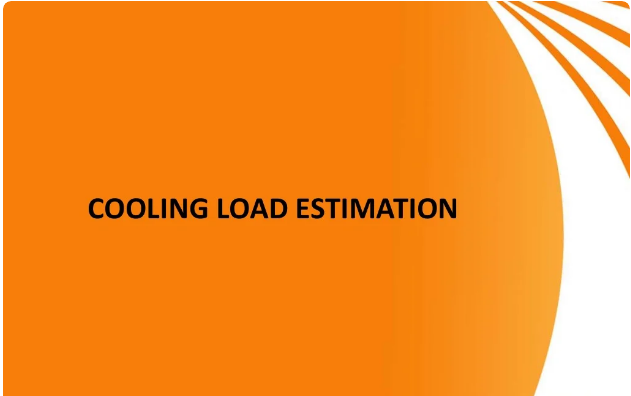

# Summary

In Concept Stage. HVAC design engineer asked for the cooling load of the building and at this stage there is no enough information about the building to
estimate the cooling load, so they depend on their expereience in previous projects for the same or the nearest location of the building to predict the load and when we say prediction it is helpful to develop a machine learning model to do this task more accurate than humans.



In [1]:
import os
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Data import and Preparation

In this Notebook, we used the dataset taken from https://cml.ics.uci.edu/, based on research by Tsanas and Xifara.

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
os.chdir("/content/gdrive/My Drive/Data Science/Ahmed Salama Data Science Projects/")

In [4]:
df = pd.read_csv('ENB2012_data.csv') 

In [5]:
df.drop(columns=['Unnamed: 5', 'Unnamed: 6'],inplace=True)

In [6]:
df.head()

,Surface Area,Roof Area,Overall Height,Orientation,Cooling Load
0,514.5,110.25,7.0,2.0,21.33
1,514.5,110.25,7.0,3.0,21.33
2,514.5,110.25,7.0,4.0,21.33
3,514.5,110.25,7.0,5.0,21.33
4,563.5,122.50,7.0,2.0,28.28


# Variable(s) Information:


+ Surface Area - m²
+ Roof Area - m²
+ Overall Height - m
+ Orientation - 2:North, 3:East, 4:South, 5:West
+ Cooling Load - kWh

In [7]:
df.shape

(1296, 5)

In [8]:
df.dropna(inplace=True)

In [9]:
df.shape

(768, 5)

In [10]:
mpl.style.use(['ggplot']) # optional: for ggplot-like style


In [11]:
df.columns

Index(['Surface Area ', 'Roof Area', 'Overall Height', 'Orientation',
       'Cooling Load'],
      dtype='object')

Relashion between Surface area and avarage cooling load 

In [12]:
SAreaVsCL=df.groupby("Surface Area ").mean()
SAreaVsCL.head()

,Roof Area,Overall Height,Orientation,Cooling Load
Surface Area,,,,
514.5,110.25,7.0,3.5,29.217031
563.5,122.50,7.0,3.5,33.820781
588.0,147.00,7.0,3.5,30.912031
612.5,147.00,7.0,3.5,28.028125
637.0,147.00,7.0,3.5,40.239375


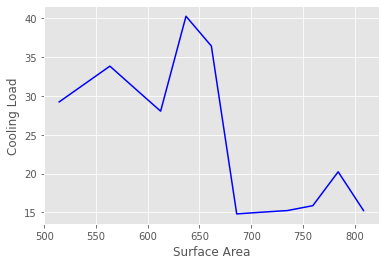

In [13]:

plt.plot( SAreaVsCL["Cooling Load"] , color='blue')
plt.xlabel("Surface Area")
plt.ylabel("Cooling Load")
plt.show()

We note that it is not nececessary the Area increases the cooling load increases

Relashion between Orientation and avarage cooling load 

In [14]:
OrienVsCL=df.groupby("Orientation").mean()
OrienVsCL.head()

,Surface Area,Roof Area,Overall Height,Cooling Load
Orientation,,,,
2.0,671.708333,176.604167,5.25,24.604531
3.0,671.708333,176.604167,5.25,24.312552
4.0,671.708333,176.604167,5.25,24.480313
5.0,671.708333,176.604167,5.25,24.953646


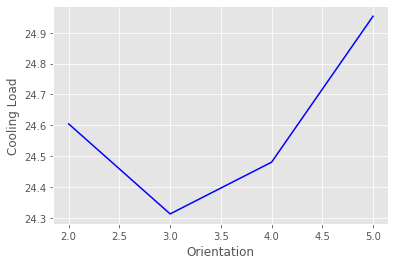

In [15]:
plt.plot( OrienVsCL["Cooling Load"] , color='blue')
plt.xlabel("Orientation")
plt.ylabel("Cooling Load")
plt.show()

What about if we create anew feature named Volume= Surface Area x Hight

In [16]:
df["Volume"]= df["Surface Area "] * df["Overall Height"]
df.head()

,Surface Area,Roof Area,Overall Height,Orientation,Cooling Load,Volume
0,514.5,110.25,7.0,2.0,21.33,3601.5
1,514.5,110.25,7.0,3.0,21.33,3601.5
2,514.5,110.25,7.0,4.0,21.33,3601.5
3,514.5,110.25,7.0,5.0,21.33,3601.5
4,563.5,122.50,7.0,2.0,28.28,3944.5


In [17]:
VolVsCL=df.groupby("Volume").mean()
VolVsCL.head()

,Surface Area,Roof Area,Overall Height,Orientation,Cooling Load
Volume,,,,,
2401.00,686.0,220.5,3.5,3.5,14.809844
2486.75,710.5,220.5,3.5,3.5,15.035469
2572.50,735.0,220.5,3.5,3.5,15.242188
2658.25,759.5,220.5,3.5,3.5,15.869844
2744.00,784.0,220.5,3.5,3.5,20.227187


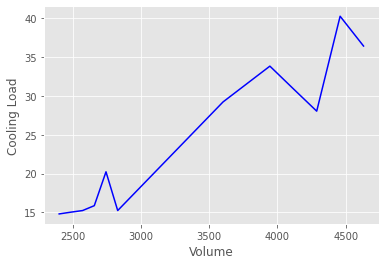

In [18]:
plt.plot( VolVsCL["Cooling Load"] , color='blue')
plt.xlabel("Volume")
plt.ylabel("Cooling Load")
plt.show()

## Create Machine learning modle to predict the Cooling Load

In [29]:
dataset=df.iloc[:, :-1]
dataset

,Surface Area,Roof Area,Overall Height,Orientation,Cooling Load
0,514.5,110.25,7.0,2.0,21.33
1,514.5,110.25,7.0,3.0,21.33
2,514.5,110.25,7.0,4.0,21.33
3,514.5,110.25,7.0,5.0,21.33
4,563.5,122.50,7.0,2.0,28.28
...,...,...,...,...,...
763,784.0,220.50,3.5,5.0,21.40
764,808.5,220.50,3.5,2.0,16.88
765,808.5,220.50,3.5,3.0,17.11
766,808.5,220.50,3.5,4.0,16.61


In [32]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values


In [33]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Multiple Linear Regression model



In [36]:
# Training the Multiple Linear Regression model on the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [45]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
y_pred

array([16.55211126, 13.67147718, 34.17484572, 33.36608354, 30.47474061,
       32.50776849, 30.70191437, 32.91173602, 32.55732135, 32.91173602,
       14.93458689, 34.40201949, 16.77928502, 34.17484572, 34.17484572,
       32.33014759, 14.93458689, 32.50776849, 19.07833067, 14.48023936,
       15.51617531, 30.47474061, 14.2530656 , 33.94767196, 13.89865094,
       14.48023936, 19.07833067, 13.21712965, 14.93458689, 33.94767196,
       18.62398315, 16.77928502, 33.94767196, 16.77928502, 30.47474061,
       35.96999099, 13.21712965, 35.96999099, 19.07833067, 17.36087344,
       16.55211126, 34.40201949, 15.97052283, 33.5932573 , 31.87580007,
       30.47474061, 14.93458689, 15.97052283, 32.28059472, 32.55732135,
       30.70191437, 18.85115691, 36.65151228, 16.3249375 , 35.96999099,
       13.89865094, 30.47474061, 33.5932573 , 34.62919325, 15.74334907,
       16.77928502, 14.2530656 , 30.70191437, 13.67147718, 14.48023936,
       13.21712965, 34.62919325, 15.28900155, 32.33014759, 34.62

In [46]:
y_test

array([17.63, 13.57, 34.62, 21.16, 33.34, 34.2 , 30.18, 30.34, 29.82,
       24.61, 11.67, 38.35, 14.65, 39.41, 37.7 , 31.06, 13.87, 34.33,
       15.38, 15.4 , 14.38, 33.13, 14.14, 43.86, 11.17, 17.37, 14.47,
       16.69, 14.27, 37.54, 13.97, 16.14, 46.44, 16.22, 29.78, 36.07,
       16.08, 36.93, 17.2 , 16.78, 13.7 , 36.77, 17.2 , 26.41, 27.3 ,
       26.02, 13.89, 15.17, 32.83, 31.  , 33.94, 14.27, 34.05, 17.64,
       37.2 , 13.7 , 21.33, 31.39, 37.26, 16.9 , 18.1 , 14.91, 33.86,
       13.72, 15.85, 14.49, 45.97, 14.55, 32.04, 36.87, 32.78, 13.79,
       24.77, 16.86, 19.48, 29.88, 32.95, 43.73, 32.88, 17.1 , 40.66,
       30.08, 13.72, 14.61, 32.54, 26.72, 25.88, 30.93, 14.37, 16.99,
       16.99, 31.28, 15.5 , 26.44, 39.55, 17.2 , 29.77, 16.44, 12.14,
       37.28, 35.1 , 28.68, 23.49, 33.87, 13.5 , 28.31, 38.56, 16.14,
       15.42, 21.33, 20.82, 33.89, 32.28, 19.29, 14.94, 19.29, 14.87,
       43.14, 27.33, 39.37, 33.14, 15.18, 15.44, 34.94, 14.74, 39.85,
       16.9 , 30.1 ,

 Multiple Linear Regression model Evaluation

In [48]:
# Explained variance score: 1 is perfect prediction
from sklearn.metrics import r2_score
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Variance score: 0.84


##Decision Tree regression


In [55]:
from sklearn.tree import DecisionTreeRegressor
regressor1 = DecisionTreeRegressor(random_state = 0)
regressor1.fit(X, y)

DecisionTreeRegressor(random_state=0)

In [56]:
# Predicting the Test set results
y_pred1 = regressor.predict(X_test)
y_pred1

array([16.55211126, 13.67147718, 34.17484572, 33.36608354, 30.47474061,
       32.50776849, 30.70191437, 32.91173602, 32.55732135, 32.91173602,
       14.93458689, 34.40201949, 16.77928502, 34.17484572, 34.17484572,
       32.33014759, 14.93458689, 32.50776849, 19.07833067, 14.48023936,
       15.51617531, 30.47474061, 14.2530656 , 33.94767196, 13.89865094,
       14.48023936, 19.07833067, 13.21712965, 14.93458689, 33.94767196,
       18.62398315, 16.77928502, 33.94767196, 16.77928502, 30.47474061,
       35.96999099, 13.21712965, 35.96999099, 19.07833067, 17.36087344,
       16.55211126, 34.40201949, 15.97052283, 33.5932573 , 31.87580007,
       30.47474061, 14.93458689, 15.97052283, 32.28059472, 32.55732135,
       30.70191437, 18.85115691, 36.65151228, 16.3249375 , 35.96999099,
       13.89865094, 30.47474061, 33.5932573 , 34.62919325, 15.74334907,
       16.77928502, 14.2530656 , 30.70191437, 13.67147718, 14.48023936,
       13.21712965, 34.62919325, 15.28900155, 32.33014759, 34.62

Decision Tree Evaluation

In [57]:
# Explained variance score: 1 is perfect prediction

print('Variance score: %.2f' % r2_score(y_test, y_pred1))

Variance score: 0.84


## Random forest Regression

In [58]:
# Training the Random Forest Regression model on the whole dataset
from sklearn.ensemble import RandomForestRegressor
regressor2 = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor2.fit(X, y)

RandomForestRegressor(n_estimators=10, random_state=0)

In [59]:
# Predicting the Test set results
y_pred2 = regressor2.predict(X_test)
y_pred2

array([15.87935642, 14.97680161, 38.90563021, 28.03150854, 29.12482492,
       35.02840394, 29.2716211 , 28.0271271 , 31.69785737, 28.0271271 ,
       15.28289042, 39.63572408, 16.12609325, 38.90563021, 38.90563021,
       30.60441928, 15.28289042, 35.02840394, 15.11908926, 15.00161028,
       15.20399001, 29.12482492, 14.88581751, 40.5161274 , 14.85406658,
       15.00161028, 15.11908926, 14.71794199, 15.28289042, 40.5161274 ,
       15.54706004, 16.12609325, 40.5161274 , 16.12609325, 29.12482492,
       36.28737529, 14.71794199, 36.28737529, 15.11908926, 20.16896918,
       15.87935642, 39.63572408, 15.42376973, 28.62505339, 31.3153603 ,
       29.12482492, 15.28289042, 15.42376973, 33.20868563, 31.69785737,
       29.2716211 , 15.1580405 , 36.51481049, 15.58847291, 36.28737529,
       14.85406658, 29.12482492, 28.62505339, 41.48697135, 15.24350415,
       16.12609325, 14.88581751, 29.2716211 , 14.97680161, 15.00161028,
       14.71794199, 41.48697135, 15.13583286, 30.60441928, 41.48

Random Forest Evaluation

In [60]:
# Explained variance score: 1 is perfect prediction

print('Variance score: %.2f' % r2_score(y_test, y_pred2))

Variance score: 0.93




## Random forest model has haigh accuracy equel 93% so when we have a new building need to estimate its cooling load we can use this model.
